In [30]:
import os
import math

dirname_taxa = '../data/Microbiome/'
#filename_tbl = 'Hyun201708_XENLA_GutVsBody.KEGG.L2.tab'
#filename_tbl = 'Hyun201708_XENLA_Antibiotic.KEGG.L2.tab'
filename_tbl = 'Hyun201708_XENLA_AdultDV.KEGG.L2.tab'

min_freq = 1000

f = open( os.path.join( dirname_taxa, filename_tbl), 'r')
f.readline()  ## header

path_freq = dict()
sample_list = f.readline().strip().split("\t")[1:-1]
sample_size = len(sample_list)
for tmp_sample in sample_list:
    #taxa_freq[tmp_sample] = {'MISC':0.0}
    path_freq[tmp_sample] = dict()
    
#taxa_list = ['MISC']
path_list = []
for line in f:
    tmp_tokens = line.strip().split("\t")
    tmp_path_name = tmp_tokens[0].replace(' ','_')
    tmp_freq_list = [float(x) for x in tmp_tokens[1:-1]]
    is_misc = 0
    if max(tmp_freq_list) >= min_freq:
        is_misc = 1
        path_list.append(tmp_path_name)
        
    for i in range(0,sample_size):
        tmp_sample = sample_list[i]
        if is_misc > 0:        
            path_freq[tmp_sample][tmp_path_name] = math.log10(tmp_freq_list[i])
        #else:
        #    taxa_freq[tmp_sample]['MISC'] = tmp_freq_list[i]
f.close()

sample_list = sorted(sample_list)
print("TaxaName\t%s"%("\t".join([x.replace('Hyun201708','') for x in sample_list])))
for tmp_p_name in sorted(path_list):
    tmp_freq_list = [path_freq[tmp_s][tmp_p_name] for tmp_s in sample_list]
    tmp_freq_str = "\t".join(['%.2f'%x for x in tmp_freq_list ])
    if max(tmp_freq_list) - min(tmp_freq_list) < 1:
        continue
    print("%s\t%s"%(tmp_p_name.split(';')[-1], tmp_freq_str))

TaxaName	XENLAAdultDorsal1	XENLAAdultDorsal2	XENLAAdultDorsal4	XENLAAdultVentral1	XENLAAdultVentral2	XENTRAdultDorsal1	XENTRAdultDorsal2	XENTRAdultVentral2
Cardiovascular_Diseases	1.43	2.02	2.57	1.28	1.48	3.18	3.66	3.10


KeyError: 'Hyun201708XENLASt45Body1'

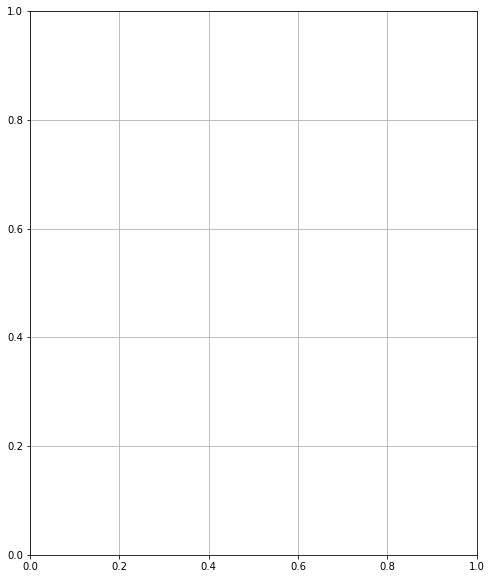

In [31]:
%matplotlib inline

import math
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)
ax1.grid()

#colors = ['orange','pink','darkblue','lightgreen']
#sample_list = ['Hyun201708XENLAAdultDorsal1','Hyun201708XENLAAdultDorsal2','Hyun201708XENLAAdultVentral1','Hyun201708XENLAAdultVentral2']
#sample_list = ['Hyun201708XENTRAdultDorsal1','Hyun201708XENTRAdultDorsal2','Hyun201708XENTRAdultVentral2']
#sample_list = ['Hyun201708XENLAAdultDorsal1','Hyun201708XENLAAdultDorsal2','Hyun201708XENTRAdultDorsal1','Hyun201708XENTRAdultDorsal2']
#sample_list = ['Hyun201708XENLAAdultVentral1','Hyun201708XENLAAdultVentral2','Hyun201708XENTRAdultVentral2']

colors = ['orange','pink','darkblue','lightgreen']
#sample_list = ['Hyun201708XENLASt41Gut1','Hyun201708XENLASt41Gut2','Hyun201708XENLASt45Gut2','Hyun201708XENLASt45Gut3']
sample_list = ['Hyun201708XENLASt45Body1','Hyun201708XENLASt45Body2','Hyun201708XENLASt45Gut2','Hyun201708XENLASt45Gut3']
#colors = ['lightblue','lightgreen','darkblue','darkgreen']
#sample_list = ['Hyun201708XENLASt43Body1','Hyun201708XENLASt43Body2','Hyun201708XENLASt45Body1','Hyun201708XENLASt45Body2']

bar_pos = 0
for tmp_path_name in sorted(path_list):          
    for tmp_s in range(0,len(sample_list)):
        tmp_sample_name = sample_list[tmp_s]
        tmp_freq = path_freq[tmp_sample_name][tmp_path_name]
        if bar_pos == 0:
            ax1.barh(bar_pos+0.4*tmp_s, tmp_freq, height=0.4, label=tmp_sample_name, facecolor=colors[tmp_s])
            #ax1.barh(bar_pos+1.2, tmp_BHI1, height=0.3, label='GamakSite1BHI', facecolor='green')
            #ax1.barh(bar_pos+1.5, tmp_BHI2, height=0.3, label='GamakSite2BHI', facecolor='lightgreen')
        else:
            ax1.barh(bar_pos+0.4*tmp_s, tmp_freq, height=0.4, facecolor=colors[tmp_s])
    bar_pos += 2

#ax1.legend(loc='lower right')
ax1.set_yticks([x+1 for x in range(0,len(path_list)*2,2)])
ax1.set_yticklabels(path_list)
ax1.set_xlabel('Percentage')
#ax1.set_xlim(0,1)
plt.show()